In [1537]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
sns.set(style="whitegrid")
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.metrics import log_loss 
from sklearn.model_selection import train_test_split
#pd.set_option('display.float_format', '{:.2f}'.format)
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
import warnings
warnings.simplefilter(action='ignore')

In [1575]:
test = pd.read_csv('test_listo.csv')
train = pd.read_csv('train_listo.csv')

In [1576]:
#train = train.drop_duplicates(subset='Opportunity_ID',keep='first') 
#test = test.drop_duplicates(subset='Opportunity_ID',keep='first') 
df = pd.concat([train,test])

In [1577]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16844 entries, 0 to 16843
Data columns (total 64 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Opportunity_ID                      16844 non-null  int64  
 1   Cantidad de Items Asociados         16844 non-null  int64  
 2   ID                                  16844 non-null  int64  
 3   Region                              16844 non-null  object 
 4   Territory                           16844 non-null  object 
 5   Pricing, Delivery_Terms_Quote_Appr  16844 non-null  int64  
 6   Pricing, Delivery_Terms_Approved    16844 non-null  int64  
 7   Bureaucratic_Code_0_Approval        16844 non-null  int64  
 8   Bureaucratic_Code_0_Approved        16844 non-null  int64  
 9   Submitted_for_Approval              16844 non-null  int64  
 10  Bureaucratic_Code                   16844 non-null  object 
 11  Account_Created_Date                16844

In [1578]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16844 entries, 0 to 16843
Data columns (total 64 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Opportunity_ID                      16844 non-null  int64  
 1   Cantidad de Items Asociados         16844 non-null  int64  
 2   ID                                  16844 non-null  int64  
 3   Region                              16844 non-null  object 
 4   Territory                           16844 non-null  object 
 5   Pricing, Delivery_Terms_Quote_Appr  16844 non-null  int64  
 6   Pricing, Delivery_Terms_Approved    16844 non-null  int64  
 7   Bureaucratic_Code_0_Approval        16844 non-null  int64  
 8   Bureaucratic_Code_0_Approved        16844 non-null  int64  
 9   Submitted_for_Approval              16844 non-null  int64  
 10  Bureaucratic_Code                   16844 non-null  object 
 11  Account_Created_Date                16844

In [1579]:
train.columns

Index(['Opportunity_ID', 'Cantidad de Items Asociados', 'ID', 'Region',
       'Territory', 'Pricing, Delivery_Terms_Quote_Appr',
       'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval',
       'Bureaucratic_Code_0_Approved', 'Submitted_for_Approval',
       'Bureaucratic_Code', 'Account_Created_Date', 'Source ',
       'Billing_Country', 'Account_Name', 'Opportunity_Name',
       'Sales_Contract_No', 'Account_Owner', 'Opportunity_Owner',
       'Account_Type', 'Opportunity_Type', 'Quote_Type', 'Delivery_Terms',
       'Opportunity_Created_Date', 'Brand', 'Product_Type', 'Size',
       'Product_Category_B', 'Price', 'Currency', 'Last_Activity',
       'Quote_Expiry_Date', 'Last_Modified_Date', 'Last_Modified_By',
       'Product_Family', 'Product_Name', 'ASP_Currency', 'ASP',
       'ASP_(converted)_Currency', 'ASP_(converted)',
       'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date', 'Month',
       'Delivery_Quarter', 'Delivery_Year', 'Actual_Delivery_Date

In [1580]:
len(set(train.Opportunity_Name))

9755

In [1581]:
len(set(test.Opportunity_Name))

1567

In [1582]:
df.Brand.value_counts()

None        17997
Other         870
Brand_9       153
Brand_5        65
Brand_10       48
Brand_24       43
Brand_11       42
Brand_13       29
Brand_25       26
Brand_22       24
Brand_7        19
Brand_21       17
Brand_23       11
Brand_20       10
Brand_27        9
Brand_17        5
Brand_12        4
Brand_2         4
Brand_0         4
Brand_4         4
Brand_19        2
Brand_16        2
Brand_26        2
Brand_6         1
Brand_8         1
Brand_1         1
Brand_18        1
Brand_3         1
Name: Brand, dtype: int64

In [1583]:
df.Bureaucratic_Code.value_counts()

Bureaucratic_Code_4    14538
Bureaucratic_Code_5     4127
Bureaucratic_Code_2      344
Bureaucratic_Code_1      303
Bureaucratic_Code_0       80
Bureaucratic_Code_3        2
Bureaucratic_Code_6        1
Name: Bureaucratic_Code, dtype: int64

In [1584]:
len(set(df.Opportunity_Name))

11322

In [1585]:
len(set(train.Account_Name))

1613

In [1586]:
df.columns

Index(['Opportunity_ID', 'Cantidad de Items Asociados', 'ID', 'Region',
       'Territory', 'Pricing, Delivery_Terms_Quote_Appr',
       'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval',
       'Bureaucratic_Code_0_Approved', 'Submitted_for_Approval',
       'Bureaucratic_Code', 'Account_Created_Date', 'Source ',
       'Billing_Country', 'Account_Name', 'Opportunity_Name',
       'Sales_Contract_No', 'Account_Owner', 'Opportunity_Owner',
       'Account_Type', 'Opportunity_Type', 'Quote_Type', 'Delivery_Terms',
       'Opportunity_Created_Date', 'Brand', 'Product_Type', 'Size',
       'Product_Category_B', 'Price', 'Currency', 'Last_Activity',
       'Quote_Expiry_Date', 'Last_Modified_Date', 'Last_Modified_By',
       'Product_Family', 'Product_Name', 'ASP_Currency', 'ASP',
       'ASP_(converted)_Currency', 'ASP_(converted)',
       'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date', 'Month',
       'Delivery_Quarter', 'Delivery_Year', 'Actual_Delivery_Date

In [1587]:
import re
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [1588]:
df.columns

Index(['Opportunity_ID', 'CantidaddeItemsAsociados', 'ID', 'Region',
       'Territory', 'PricingDelivery_Terms_Quote_Appr',
       'PricingDelivery_Terms_Approved', 'Bureaucratic_Code_0_Approval',
       'Bureaucratic_Code_0_Approved', 'Submitted_for_Approval',
       'Bureaucratic_Code', 'Account_Created_Date', 'Source',
       'Billing_Country', 'Account_Name', 'Opportunity_Name',
       'Sales_Contract_No', 'Account_Owner', 'Opportunity_Owner',
       'Account_Type', 'Opportunity_Type', 'Quote_Type', 'Delivery_Terms',
       'Opportunity_Created_Date', 'Brand', 'Product_Type', 'Size',
       'Product_Category_B', 'Price', 'Currency', 'Last_Activity',
       'Quote_Expiry_Date', 'Last_Modified_Date', 'Last_Modified_By',
       'Product_Family', 'Product_Name', 'ASP_Currency', 'ASP',
       'ASP_converted_Currency', 'ASP_converted',
       'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date', 'Month',
       'Delivery_Quarter', 'Delivery_Year', 'Actual_Delivery_Date', 'TRF',
  

In [1589]:
mis_brand=pd.crosstab(df.Opportunity_ID,df.Brand).reset_index()
df=pd.merge(df, mis_brand,on='Opportunity_ID' ,how='inner')

In [1590]:
mis_Burocratic_code=pd.crosstab(df.Opportunity_ID,df.Bureaucratic_Code).reset_index()
df=pd.merge(df, mis_Burocratic_code,on='Opportunity_ID' ,how='inner')

In [1591]:
mis_Product_Name=pd.crosstab(df.Opportunity_ID,df.Product_Name).reset_index()
df=pd.merge(df, mis_Product_Name,on='Opportunity_ID' ,how='inner')

In [1592]:
pd.crosstab(df.Opportunity_ID,df.Estacin).reset_index()
#df=pd.merge(df, mis_Product_Name,on='Opportunity_ID' ,how='inner')

Estacin,Opportunity_ID,Invierno,Otoño,Primavera,Verano
0,2,0,1,0,0
1,3,0,1,0,0
2,4,0,1,0,0
3,5,0,1,0,0
4,6,0,1,0,0
...,...,...,...,...,...
10718,12799,0,1,0,0
10719,12800,0,2,0,0
10720,12801,0,3,0,0
10721,12802,0,1,0,0


In [1593]:
df.head()

,Opportunity_ID,CantidaddeItemsAsociados,ID,Region,Territory,PricingDelivery_Terms_Quote_Appr,PricingDelivery_Terms_Approved,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,...,Product_Name_90,Product_Name_91,Product_Name_92,Product_Name_93,Product_Name_94,Product_Name_95,Product_Name_96,Product_Name_97,Product_Name_98,Product_Name_99
0,0,1,27761,Europa,None,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,27760,Europa,None,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,27446,América,NW America,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,3,1,16808,América,NW America,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1,16805,América,NW America,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1594]:
train.Stage.value_counts()

Closed Won     9529
Closed Lost    7315
Name: Stage, dtype: int64

In [1595]:
train.fillna(0,inplace=True)
test.fillna(0,inplace=True)
#train.rename(columns={'Estación':'Estacion'},inplace=True)
#test.rename(columns={'Estación':'Estacion'},inplace=True)

In [1596]:
#train.Source.fillna('nada',inplace=True)
#test.Source.fillna('nada',inplace=True)

* One Hot Encoding y Label Encoding

In [1597]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

In [1598]:
def LabelEncord_categorical(df):
    categorical_features = ['Region','Territory','Source','Billing_Country', 'Account_Name','Account_Owner',\
                            'Opportunity_Owner','Account_Type', 'Opportunity_Type', 'Quote_Type','Delivery_Quarter', \
                            'Delivery_Terms','Last_Modified_By',\
                            'Product_Family', 'Product_Name','ASP_Currency','Prod_Category_A', 'Hemisferio', 'Estacin']
    for features in categorical_features:
        le = LabelEncoder()
        df[features] = le.fit_transform(df[features].astype(str))
    return df

def dummies(df):
    categorical_features = []
    for features in categorical_features:
        dummies =  pd.get_dummies(df[features])
        df = pd.concat([df, dummies],axis=1)
    return df

def pre_processing(df):
    df = LabelEncord_categorical(df)
    return df

df = pre_processing(df)
#train = pre_processing(train)
#test = pre_processing(test)

In [1599]:
train =train[['ID']]
train = pd.merge(train,df, on= 'ID', how = 'inner') 
test =test[['ID']]
test = pd.merge(test,df, on= 'ID', how = 'inner') 

In [1600]:
train.loc[train['Stage']=='Closed Won','Stage']=1
train.loc[train['Stage']=='Closed Lost','Stage']=0
train.Stage=train.Stage.astype('float')

In [1601]:
train.Stage.value_counts()

1.0    9529
0.0    7315
Name: Stage, dtype: int64

In [1602]:
#train.loc[train['Stage']==1,:].iloc[0:4719]

In [1603]:
train.head(10)

,ID,Opportunity_ID,CantidaddeItemsAsociados,Region,Territory,PricingDelivery_Terms_Quote_Appr,PricingDelivery_Terms_Approved,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,...,Product_Name_90,Product_Name_91,Product_Name_92,Product_Name_93,Product_Name_94,Product_Name_95,Product_Name_96,Product_Name_97,Product_Name_98,Product_Name_99
0,27761,0,1,2,49,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
1,27760,1,1,2,49,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,27446,2,1,0,46,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,16808,3,1,0,46,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16805,4,1,0,46,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,16802,5,1,0,46,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,16799,6,1,0,46,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,27455,7,1,0,46,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8,24353,8,5,1,33,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,24355,8,5,1,33,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1604]:
test.head()

,ID,Opportunity_ID,CantidaddeItemsAsociados,Region,Territory,PricingDelivery_Terms_Quote_Appr,PricingDelivery_Terms_Approved,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,...,Product_Name_90,Product_Name_91,Product_Name_92,Product_Name_93,Product_Name_94,Product_Name_95,Product_Name_96,Product_Name_97,Product_Name_98,Product_Name_99
0,6140,10689,3,2,26,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,6146,10689,3,2,26,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,6151,10689,3,2,26,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,6118,10690,5,2,26,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,6124,10690,5,2,26,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [1605]:
categorical_features = ['Region','Territory','Source ','Billing_Country', 'Account_Name','Account_Owner',\
                            'Opportunity_Owner','Account_Type', 'Opportunity_Type', 'Quote_Type','Delivery_Quarter', \
                            'Delivery_Terms','Last_Modified_By',\
                            'Product_Family', 'Product_Name','ASP_Currency','Prod_Category_A', 'Hemisferio', 'Estacion']

In [1606]:
# Aca saco las columnas(labels que no quiero que las tome mi algoritmo)
features = list(set(train.columns) - set(['ID','Stage','contrato','Sales_Contract_No','Opportunity_ID','Opportunity_Created_Date','Account_Created_Date','Opportunity_Name',\
                                        'Price', 'Currency', 'ASP', 'ASP_converted_Currency', 'ASP_(converted)',\
                                        'Planned_Delivery_Start_Date','Size', 'Planned_Delivery_End_Date', 'Month',\
                                         'Delivery_Year', 'Actual_Delivery_Date','Product_Type','Product_Category_B',\
                                        'Total_Amount_Currency', 'Total_Amount','Last_Activity',\
                                        'Quote_Expiry_Date', 'Last_Modified_Date',\
                                        'Total_Taxable_Amount_Currency', 'Total_Taxable_Amount','Account_Created_Date'\
                                          ,'Total_moneda_local','ASP_Currency','Last_Modified_By','Brand','Bureaucratic_Code',\
                                         'tiempo_creacion_ulti_mod','ASP_converted','Product_Name']))
#features

In [1570]:
train.head()

,ID,Opportunity_ID,CantidaddeItemsAsociados,Region,Territory,PricingDelivery_Terms_Quote_Appr,PricingDelivery_Terms_Approved,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,...,Product_Name_90,Product_Name_91,Product_Name_92,Product_Name_93,Product_Name_94,Product_Name_95,Product_Name_96,Product_Name_97,Product_Name_98,Product_Name_99
0,27761,0,1,2,49,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
1,27760,1,1,2,49,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,27446,2,1,0,46,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,16808,3,1,0,46,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16805,4,1,0,46,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1571]:
train['Product_Name'].value_counts()

3      971
141    835
147    574
427    524
326    474
      ... 
395      1
493      1
250      1
445      1
449      1
Name: Product_Name, Length: 446, dtype: int64

In [1607]:
#train = train.drop_duplicates(subset='Opportunity_ID',keep='first') 
#test = test.drop_duplicates(subset='Opportunity_ID',keep='first') 
train.Stage.value_counts()

1.0    9529
0.0    7315
Name: Stage, dtype: int64

In [1573]:
train_pos= train.loc[train['Stage']==1,:].sample(7315)
train_neg = train.loc[train['Stage']==0,:].sample(7315)
train=pd.concat([train_pos,train_neg]).drop_duplicates(keep=False)
train= shuffle(train)

In [1608]:
train.Stage.value_counts()

1.0    9529
0.0    7315
Name: Stage, dtype: int64

In [1609]:
X = train[features]
Y = train['Stage']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [1610]:
y_train.value_counts()

1.0    7583
0.0    5892
Name: Stage, dtype: int64

In [1611]:
gbm = LGBMClassifier()

In [1612]:
gbm.fit(x_train[features], y_train)

LGBMClassifier()

In [1613]:
#Veo que esta considerando como importante de mas a menos mi algoritmo
pd.DataFrame(list(zip(x_train[features], gbm.feature_importances_))).sort_values(by=1,ascending=False).head(50)

,0,1
537,Account_Name,254
459,monto_en_dolares_min,188
131,media_por_items,171
3,monto_en_dolares_std,164
82,Opportunity_Owner,153
74,total_en_dolares,150
319,Account_Owner,125
301,Billing_Country,112
233,Bureaucratic_Code_5,111
569,Product_Family,99


In [1614]:
#feature_imp = pd.DataFrame(sorted(zip(gbm.feature_importances_,X.columns)), columns=['Value','Feature'])

#plt.figure(figsize=(20, 10))
#sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
#plt.title('LightGBM Features (avg over folds)')
#plt.tight_layout()
#plt.show()

In [1615]:
scores = cross_val_score(gbm, train[features], train['Stage'], cv=3,scoring= 'neg_log_loss')
scores

array([-0.37007858, -0.55180348, -0.42001242])

In [1616]:
abs(scores.mean())

0.44729816015722923

In [1519]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       do_probabilities = True):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2)
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
        pred = fitted_model.predict_proba(X_test_data)[:,1]
    else:
        pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [1264]:
model = lgb.LGBMClassifier()
param_grid = {
    'n_estimators': [10,50, 90],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'num_leaves': [50, 100, 200],
}

model, pred = algorithm_pipeline(x_train, x_test, y_train, y_test, model, 
                                 param_grid, cv=5, scoring_fit='neg_log_loss')

print(model.best_score_)
print(model.best_params_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


KeyboardInterrupt: 

In [923]:
model.best_params_

{'colsample_bytree': 0.7,
 'max_depth': 15,
 'n_estimators': 100,
 'num_leaves': 50}

In [1265]:
gbm = lgb.LGBMClassifier()

In [1617]:
gbm.fit(x_train[features], y_train)

LGBMClassifier()

In [1618]:
x_test['prediccion']=gbm.predict_proba(x_test[features])[:,1]

In [1619]:
x_test['prediccion']

1192     0.880639
4478     0.368346
12467    0.028948
9660     0.997080
6873     0.320287
           ...   
1041     0.995564
10590    0.993255
12902    0.030974
6503     0.881348
15869    0.001831
Name: prediccion, Length: 3369, dtype: float64

In [1620]:
x_test['real'] = y_test

In [1621]:
x_test['accuracy'] = x_test.apply(
    lambda row: int(1) if (abs(row['real']-row['prediccion'])<=0.5) else int(0), axis=1)

In [1622]:
x_test['accuracy'].mean()

0.9008607895517958

In [1623]:
log_loss( x_test['real'].astype('float'),x_test['prediccion'].astype('float'))

0.2284506716253802

In [1624]:
gbm.fit(train[features], train['Stage'])

LGBMClassifier()

In [1625]:
#test.info()

In [1626]:
pred = gbm.predict_proba(test[features])[:,1]

In [1627]:
len(pred)

2551

In [1628]:
len(test['Opportunity_ID'])

2551

In [1629]:
test['target']=pred

In [1630]:
test['target'].value_counts()

0.226393    26
0.001143    18
0.491705    10
0.905649     9
0.908301     9
            ..
0.391514     1
0.001076     1
0.001169     1
0.605809     1
0.510979     1
Name: target, Length: 1659, dtype: int64

In [1631]:
test[['Opportunity_ID', 'target']]

,Opportunity_ID,target
0,10689,0.862382
1,10689,0.862382
2,10689,0.883664
3,10690,0.748388
4,10690,0.748388
...,...,...
2546,12364,0.973397
2547,12365,0.470257
2548,12366,0.447470
2549,12367,0.753267


In [1632]:
test['target'].mean()

0.5854032528747836

In [1635]:
test.groupby(['Opportunity_ID'], as_index=False)['target'].mean()[['Opportunity_ID', 'target']]

,Opportunity_ID,target
0,10689,0.869476
1,10690,0.758215
2,10691,0.836569
3,10692,0.789233
4,10693,0.973172
...,...,...
1562,12364,0.973397
1563,12365,0.470257
1564,12366,0.447470
1565,12367,0.753267


In [ ]:
#test =test[['ID']]
#test = pd.merge(test,df, on= 'ID', how = 'inner') 

In [1636]:
test =test.groupby(['Opportunity_ID'], as_index=False)['target'].mean()[['Opportunity_ID', 'target']]

In [1638]:
test.head(50)

,Opportunity_ID,target
0,10689,0.869476
1,10690,0.758215
2,10691,0.836569
3,10692,0.789233
4,10693,0.973172
5,10694,0.973172
6,10695,0.878056
7,10696,0.873956
8,10697,0.792313
9,10698,0.767340


In [1639]:
test.tail(30)

,Opportunity_ID,target
1537,12339,0.180154
1538,12340,0.739984
1539,12341,0.792648
1540,12342,0.974488
1541,12343,0.968718
1542,12344,0.960079
1543,12345,0.029691
1544,12346,0.034064
1545,12347,0.062690
1546,12348,0.018464


In [1640]:
test['target'] = test.apply(lambda row: int(1) if (abs(1-row['target'])<=0.2) else row['target'],axis=1)

In [1642]:
test['target'] = test.apply(lambda row: int(0) if (abs(1-row['target'])>=0.6) else row['target'],axis=1)

In [1644]:
test

,Opportunity_ID,target
0,10689,1.000000
1,10690,0.758215
2,10691,1.000000
3,10692,0.789233
4,10693,1.000000
...,...,...
1562,12364,1.000000
1563,12365,0.470257
1564,12366,0.447470
1565,12367,0.753267


In [1645]:
test[['Opportunity_ID', 'target']].to_csv("subidas/lgbm_label_enc_redondeo_1.csv", index=False)

In [1404]:
test.groupby(['Opportunity_ID'], as_index=False)['target'].mean()[['Opportunity_ID', 'target']].to_csv("subidas/lgbm_label_enc_brand_B_code_sampleado_7.csv", index=False)

In [1405]:
#train = train.drop_duplicates(subset='Opportunity_ID',keep='first') 
test = test.drop_duplicates(subset='Opportunity_ID',keep='first') 

In [1407]:
test[['Opportunity_ID', 'target']]

,Opportunity_ID,target
0,10689,0.876847
3,10690,0.745981
8,10691,0.860289
9,10692,0.772647
15,10693,0.945405
...,...,...
2545,12364,0.972206
2547,12365,0.447213
2548,12366,0.397429
2549,12367,0.726380


In [80]:
def mi_log_loss(model):
    rmse= (-cross_val_score(model, x_train, y_train, scoring= 'neg_log_loss', cv = 3))
    return(rmse)

In [447]:
from sklearn.ensemble import BaggingClassifier
n_estimators = [100, 200, 300, 400]
cv_rmse_br = [mi_log_loss(BaggingClassifier(n_estimators = n_estimator)).mean() 
            for n_estimator in n_estimators]

In [448]:
print (cv_rmse_br)

[0.4087965475313204, 0.37307931581264797, 0.37404308001634573, 0.37678595717893865]


In [ ]:
print (cv_rmse_br.mean())

Text(0, 0.5, 'log_loss')

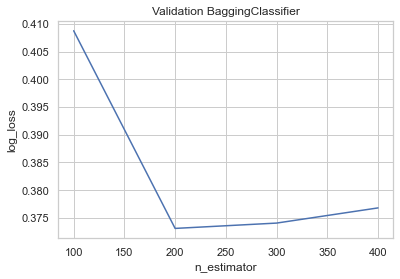

In [449]:
cv_br = pd.Series(cv_rmse_br , index = n_estimators)
cv_br.plot(title = "Validation BaggingClassifier")
plt.xlabel("n_estimator")
plt.ylabel("log_loss")

In [464]:
clf = BaggingClassifier(n_estimators=200).fit(X, Y)
x_test['prediccion']=clf.predict_proba(x_test[features])[:,1]

In [465]:
log_loss( x_test['real'].astype('float'),x_test['prediccion'].astype('float'))

0.09167631282871615

In [466]:
pred = clf.predict_proba(test[features])[:,1]

In [467]:
test['target']=pred

In [468]:
test[['Opportunity_ID', 'target']].head(50)

,Opportunity_ID,target
0,10689,0.930
3,10690,0.590
8,10691,0.860
9,10692,0.460
15,10693,0.955
16,10694,0.955
17,10695,0.725
20,10696,0.710
24,10697,0.890
29,10698,0.900


In [537]:
test[['Opportunity_ID', 'target']].to_csv("subidas/lgbm_label_enc_probar_7.csv", index=False)

In [461]:
from sklearn.ensemble import BaggingClassifier
n_estimators = [100, 200, 300, 400]
cv_rmse_br = [mi_log_loss(BaggingClassifier(LGBMClassifier(),n_estimators = n_estimator)).mean() 
            for n_estimator in n_estimators]

In [462]:
print (cv_rmse_br)

[0.33589159516508754, 0.33560500364629364, 0.3352649816220086, 0.3354283099095243]


Text(0, 0.5, 'log_loss')

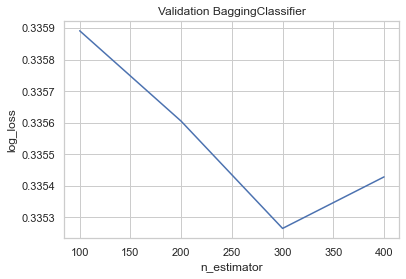

In [463]:
cv_br = pd.Series(cv_rmse_br , index = n_estimators)
cv_br.plot(title = "Validation BaggingClassifier")
plt.xlabel("n_estimator")
plt.ylabel("log_loss")

In [476]:
clf = BaggingClassifier(LGBMClassifier(),n_estimators=300).fit(x_train, y_train)
x_test['prediccion']=clf.predict_proba(x_test[features])[:,1]

In [477]:
log_loss( x_test['real'].astype('float'),x_test['prediccion'].astype('float'))

0.33152612125000896

In [478]:
pred = clf.predict_proba(test[features])[:,1]

In [479]:
test['target']=pred

In [480]:
test[['Opportunity_ID', 'target']].head(50)

,Opportunity_ID,target
0,10689,0.955994
3,10690,0.696907
8,10691,0.956094
9,10692,0.893969
15,10693,0.980274
16,10694,0.974890
17,10695,0.905493
20,10696,0.903175
24,10697,0.957219
29,10698,0.904838


In [475]:
test[['Opportunity_ID', 'target']].to_csv("subidas/lgbm_label_enc_probar_5.csv", index=False)